# First part: Load dataset, preprocess and investigate the data


### a) Load required packages

In [ ]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import random

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

tf.set_random_seed(22)
np.random.seed(22)
random.seed(22)

Using TensorFlow backend.


### b) Reshape a data set to fit into the CNN

In [2]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
# reshape dataset to have a single channel
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)) 

### c) Normalize the inputs for more stable learning process

In [3]:
x_train = x_train / 255.0
x_test = x_test / 255.0

### d) One-hot encode the labels 

In [4]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

### e) Investigate the shape of x_train, x_test, y_train, y_test

In [5]:
# x_train.shape 60000 images of size 28x28, 1 channel
print( 'X_train shape is {}'.format( x_train.shape ) )
print( 'y_train shape is {}'.format( y_train.shape ) )
print( 'X_test shape is {}'.format( x_test.shape ) )
print( 'y_test shape is {}'.format( y_test.shape ) )

X_train shape is (60000, 28, 28, 1)
y_train shape is (60000, 10)
X_test shape is (10000, 28, 28, 1)
y_test shape is (10000, 10)


### f) Define the helper functions

In [ ]:
def plot_history(history):
    print(history.history.keys())
    
    # Plot accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    # Plot loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

def evaluate_model(model, x_train, y_train, x_test, y_test):
    _, accuracy_train = model.evaluate(x_train, y_train)
    _, accuracy_test = model.evaluate(x_test, y_test)
    print('Training accuracy: %.2f' % (accuracy_train * 100))
    print('Testing accuracy: %.2f' % (accuracy_test * 100))
    return accuracy_train, accuracy_test

# Stage 1: Build a neural network without convolutional layers

### Reshape x_train, x_test for stage 1:
Since stage 1's models do not require convolutional layers, the shape with the format: (number of images, height, width, number of channels) is not suitable. Instead, the shape (number of samples, number of input features) is needed.

In [6]:
x_train_stage1 = x_train.reshape((60000,28*28))
x_test_stage1 = x_test.reshape((10000,28*28))
print( 'x_train_stage1 shape is {}'.format( x_train_stage1.shape ) )
print( 'x_test_stage1 shape is {}'.format( x_test_stage1.shape ) )

x_train_stage1 shape is (60000, 784)
x_test_stage1 shape is (10000, 784)


### 1.1. The first model of tage 1:

1.1.1 Build the first model of stage 1:

In [7]:
model = Sequential(name="model_1_stage1")
model.add(Dense(32, input_dim=784, activation='relu')) 
model.add(Dense(8, activation='relu'))
model.add(Dense(10, activation='softmax'))

learning_rate = 0.001
epochs = 10
decay_rate = learning_rate / epochs 
sgd = SGD(lr=learning_rate, momentum=0.8, decay=decay_rate) 

model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy']) 


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


1.1.2. Investigate the model:

In [8]:
model.summary()

Model: "model_1_stage1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 264       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                90        
Total params: 25,474
Trainable params: 25,474
Non-trainable params: 0
_________________________________________________________________


1.1.3. Train and test the first model of stage 1: 


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 109us/step - loss: 1.1178 - accuracy: 0.6254 - val_loss: 0.6730 - val_accuracy: 0.7697
Epoch 2/10
60000/60000 [==============================] - 6s 93us/step - loss: 0.5868 - accuracy: 0.7982 - val_loss: 0.5779 - val_accuracy: 0.8005
Epoch 3/10
60000/60000 [==============================] - 7s 113us/step - loss: 0.5286 - accuracy: 0.8175 - val_loss: 0.5446 - val_accuracy: 0.8093
Epoch 4/10
60000/60000 [==============================] - 7s 110us/step - loss: 0.5017 - accuracy: 0.8267 - val_loss: 0.5282 - val_accuracy: 0.8174
Epoch 5/10
60000/60000 [==============================] - 5s 80us/step - loss: 0.4859 - accuracy: 0.8330 - val_loss: 0.5125 - val_accuracy: 0.8207
Epoch 6/10
60000/60000 [==============================] - 4s 71us/step - loss: 0.4734 - accuracy: 0.8371 - val_loss: 0.5039 - val_accuracy: 0.8240
Epoch 7/10
60000/60000 [==============================] - 5s 78u

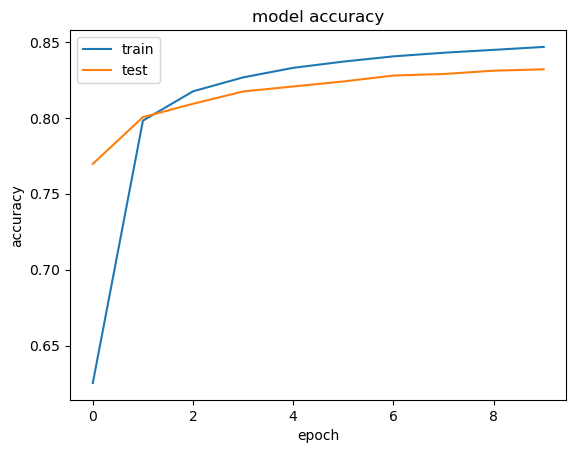

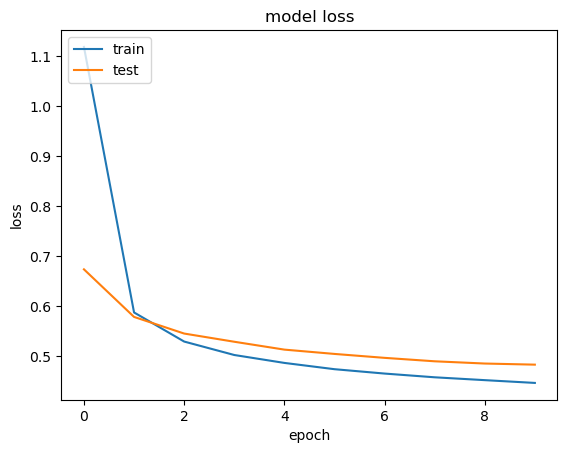

In [ ]:
history = model.fit(x_train_stage1 , y_train, epochs=epochs, batch_size=16, validation_data = (x_test_stage1, y_test), verbose=1)
plot_history(history)

In [ ]:
train_acc, test_acc = evaluate_model(model, x_train, y_train, x_test, y_test)

10000/10000 [==============================] - 0s 19us/step
Training accuracy: 84.75
Testing accuracy: 83.20


### 1.2. The second model of stage 1:

1.2.1. Build the second model of stage 1:

Changes:
- The neural network has another 16-neuron layer as the second hidden layer
- epochs = 20 instead of 10

In [11]:
model = Sequential( name = "model_2_stage1")
model.add(Dense(32, input_dim=784, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(10, activation='softmax'))

learning_rate = 0.001
epochs = 20
decay_rate = learning_rate / epochs 
sgd = SGD(lr=learning_rate, momentum=0.8, decay=decay_rate) 

model.compile(loss='categorical_crossentropy', optimizer= sgd, metrics=['accuracy']) 

1.2.2. Investigate the model:

In [12]:
model.summary()

Model: "model_2_stage1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_5 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_7 (Dense)              (None, 10)                90        
Total params: 25,874
Trainable params: 25,874
Non-trainable params: 0
_________________________________________________________________


1.2.3. Train and test the second model of stage 1:

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 117us/step - loss: 1.0453 - accuracy: 0.6477 - val_loss: 0.6423 - val_accuracy: 0.7673
Epoch 2/20
60000/60000 [==============================] - 5s 89us/step - loss: 0.5617 - accuracy: 0.8009 - val_loss: 0.5402 - val_accuracy: 0.8129
Epoch 3/20
60000/60000 [==============================] - 6s 93us/step - loss: 0.4997 - accuracy: 0.8253 - val_loss: 0.5014 - val_accuracy: 0.8231
Epoch 4/20
60000/60000 [==============================] - 6s 103us/step - loss: 0.4669 - accuracy: 0.8352 - val_loss: 0.4861 - val_accuracy: 0.8277
Epoch 5/20
60000/60000 [==============================] - 7s 114us/step - loss: 0.4455 - accuracy: 0.8426 - val_loss: 0.4668 - val_accuracy: 0.8350
Epoch 6/20
60000/60000 [==============================] - 8s 131us/step - loss: 0.4299 - accuracy: 0.8476 - val_loss: 0.4682 - val_accuracy: 0.8348
Epoch 7/20
60000/60000 [==============================] - 7s 118

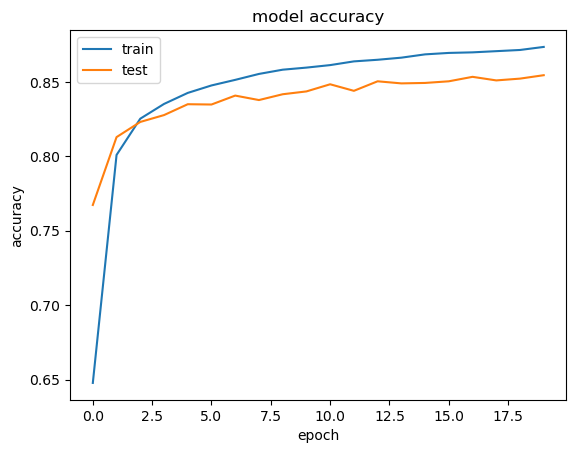

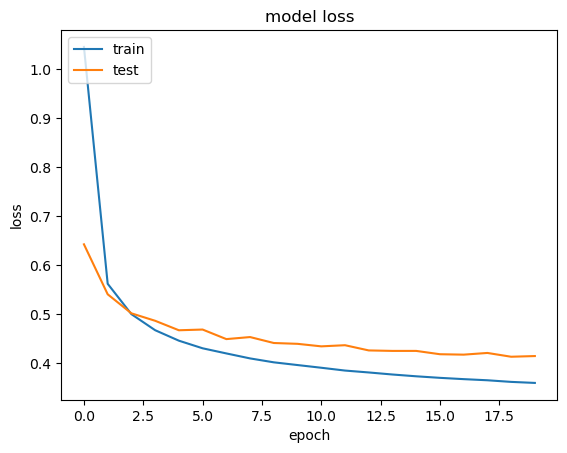

In [ ]:
history = model.fit(x_train_stage1 , y_train, epochs=epochs, batch_size=16, validation_data=(x_test_stage1, y_test), verbose=1)
plot_history(history)

In [ ]:
train_acc, test_acc = evaluate_model(model, x_train, y_train, x_test, y_test)

10000/10000 [==============================] - 0s 28us/step
Training accuracy: 87.29
Testing accuracy: 85.45


✅ Insight: Adding more layers and training longer improved performance by ~2%. However, due to the absence of convolutional operations, the model struggled to extract complex spatial features from images.

# Stage 2: Build a neural network with the use of convolutional layers:

### 2.1. Stage 2's first model:

2.1.1. Build stage 2's first model:

In [15]:
model = Sequential(name = "model_1_stage2")
model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1), padding='same', activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D()) 
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

epochs = 5
lrate = 0.001
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

2.1.2. Investigate the model:

In [16]:
model.summary()

Model: "model_1_stage2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               3211776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)             

2.1.3. Train and test stage 2's first model:


Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 63s 1ms/step - loss: 0.7908 - accuracy: 0.7260 - val_loss: 0.5419 - val_accuracy: 0.7963
Epoch 2/5
60000/60000 [==============================] - 63s 1ms/step - loss: 0.4929 - accuracy: 0.8224 - val_loss: 0.4599 - val_accuracy: 0.8330
Epoch 3/5
60000/60000 [==============================] - 68s 1ms/step - loss: 0.4391 - accuracy: 0.8419 - val_loss: 0.4231 - val_accuracy: 0.8483
Epoch 4/5
60000/60000 [==============================] - 86s 1ms/step - loss: 0.4109 - accuracy: 0.8522 - val_loss: 0.4091 - val_accuracy: 0.8570
Epoch 5/5
60000/60000 [==============================] - 68s 1ms/step - loss: 0.3903 - accuracy: 0.8601 - val_loss: 0.3988 - val_accuracy: 0.8554
dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


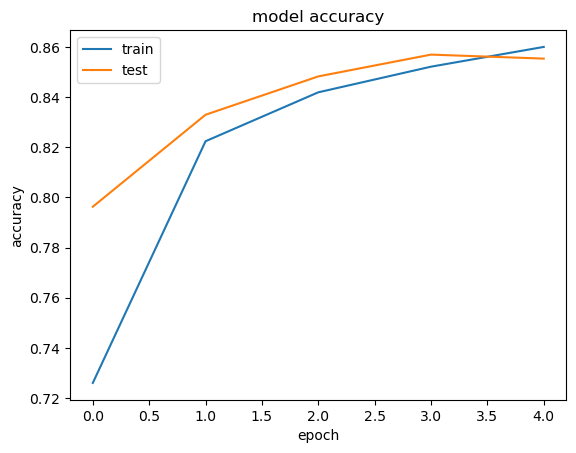

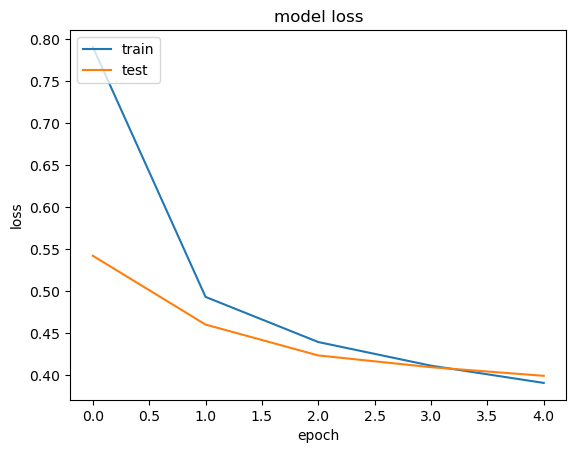

In [ ]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=64, verbose=1)
plot_history(history)

In [ ]:
train_acc, test_acc = evaluate_model(model, x_train, y_train, x_test, y_test)

10000/10000 [==============================] - 4s 417us/step
Training accuracy: 86.77
Testing accuracy: 85.54


CNN introduces feature extraction, improving test accuracy compared to fully connected models despite fewer epochs.

### 2.2. Stage 2's second model:

2.2.1. Build stage 2's second model:

Changes:
- add some convolutional layers, some max pooling layers and 1 fully connected layer
- change epochs from 5 to 10


In [ ]:
# I'm going to reuse this function to build this model multiple times
def build_cnn_model():
    model = Sequential(name = "model_2_stage2")
    model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1), activation='relu', padding='same'))
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D())
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))        # added
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))        # added
    model.add(MaxPooling2D())                                               # added
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))       # added
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))       # added
    model.add(MaxPooling2D())                                               # added
    model.add(Flatten())
    model.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3))) # added
    model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))
    return model

model = build_cnn_model()

epochs = 10
lrate = 0.001
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

2.2.2. Investigate the model:

In [20]:
model.summary()

Model: "model_2_stage2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 7, 7, 128)      

2.2.3. Train and test stage 2's second model:

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 177s 3ms/step - loss: 1.2320 - accuracy: 0.5889 - val_loss: 0.6321 - val_accuracy: 0.7719
Epoch 2/10
60000/60000 [==============================] - 224s 4ms/step - loss: 0.5794 - accuracy: 0.7880 - val_loss: 0.5459 - val_accuracy: 0.8039
Epoch 3/10
60000/60000 [==============================] - 231s 4ms/step - loss: 0.4790 - accuracy: 0.8257 - val_loss: 0.4805 - val_accuracy: 0.8200
Epoch 4/10
60000/60000 [==============================] - 229s 4ms/step - loss: 0.4318 - accuracy: 0.8414 - val_loss: 0.4453 - val_accuracy: 0.8346
Epoch 5/10
60000/60000 [==============================] - 234s 4ms/step - loss: 0.3998 - accuracy: 0.8531 - val_loss: 0.4024 - val_accuracy: 0.8536
Epoch 6/10
60000/60000 [==============================] - 234s 4ms/step - loss: 0.3775 - accuracy: 0.8622 - val_loss: 0.3948 - val_accuracy: 0.8584
Epoch 7/10
60000/60000 [==============================] - 228s

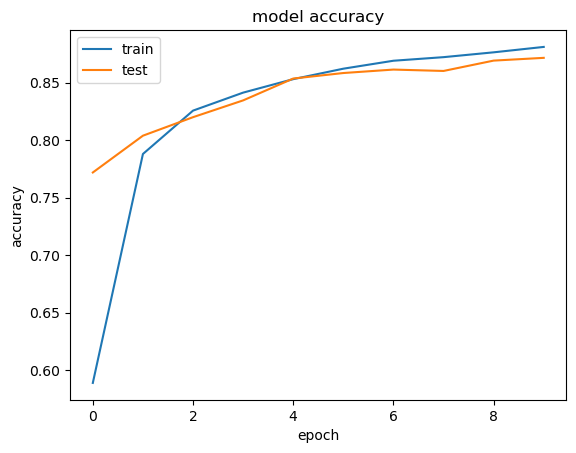

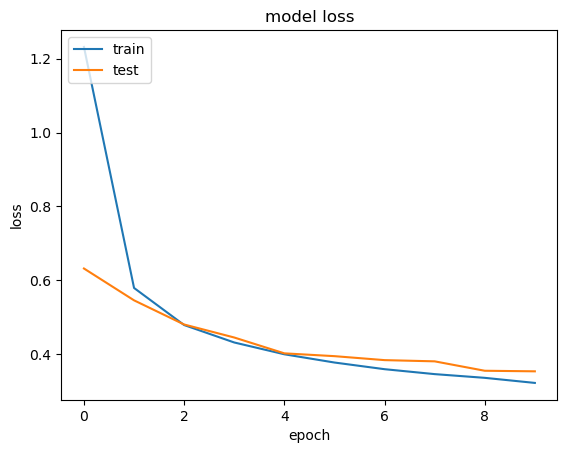

In [ ]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=64, verbose=1)
plot_history(history)

In [22]:
_, accuracy_train = model.evaluate(x_train, y_train)
_, accuracy_test = model.evaluate(x_test, y_test)
print('Training accuracy: %.2f' % (accuracy_train*100))
print('Testing accuracy: %.2f' % (accuracy_test*100))

10000/10000 [==============================] - 11s 1ms/step
Training accuracy: 88.99
Testing accuracy: 87.16


✅ Insight: The deeper CNN with 6 Conv layers and 3 MaxPooling layers with more epochs improved generalization.

# Stage 3:

### 3.1. Change stage 2's second model's optimizer from SGD to adam:

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 212s 4ms/step - loss: 0.4576 - accuracy: 0.8319 - val_loss: 0.3039 - val_accuracy: 0.8894
Epoch 2/10
60000/60000 [==============================] - 198s 3ms/step - loss: 0.2727 - accuracy: 0.9013 - val_loss: 0.2509 - val_accuracy: 0.9062
Epoch 3/10
60000/60000 [==============================] - 234s 4ms/step - loss: 0.2292 - accuracy: 0.9161 - val_loss: 0.2270 - val_accuracy: 0.9164
Epoch 4/10
60000/60000 [==============================] - 234s 4ms/step - loss: 0.1988 - accuracy: 0.9262 - val_loss: 0.2430 - val_accuracy: 0.9124
Epoch 5/10
60000/60000 [==============================] - 228s 4ms/step - loss: 0.1769 - accuracy: 0.9340 - val_loss: 0.2357 - val_accuracy: 0.9224
Epoch 6/10
60000/60000 [==============================] - 232s 4ms/step - loss: 0.1568 - accuracy: 0.9414 - val_loss: 0.2549 - val_accuracy: 0.9138
Epoch 7/10
60000/60000 [==============================] - 184s

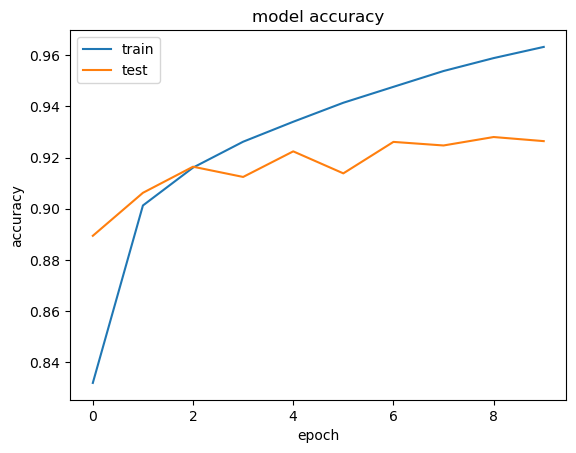

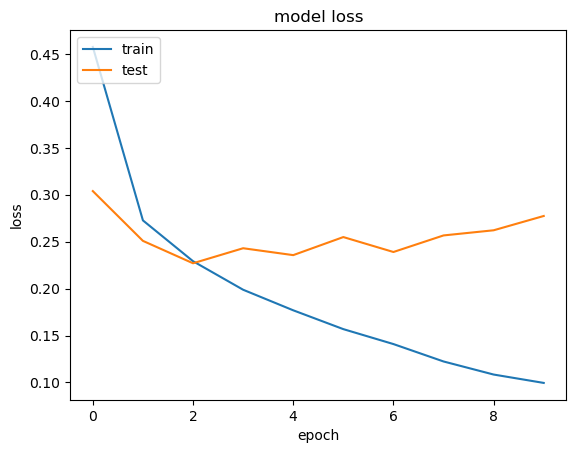

In [ ]:
model = build_cnn_model()

epochs = 10

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=64, verbose=1)
plot_history(history)

In [ ]:
train_acc, test_acc = evaluate_model(model, x_train, y_train, x_test, y_test)

10000/10000 [==============================] - 18s 2ms/step
Training accuracy: 97.54
Testing accuracy: 92.64


✅ Insight: Adam (adaptive moment estimation) is an optimization algorithm that combines both gradient descent with momentum and RMSprop. 

Momentum: Momentum updates the weights based on the exponentially weighted average of past gradients. This helps to smooth out the optimization trajectory, allowing the model to avoid oscillations and accelerate towards minima.

RMSprop (Root Mean Square Propagation): Instead of focusing on the averages of the gradients, this algorithm considers the squares of the gradients. Its goal is the same, which is to prevent the model from taking giant steps in directions with high gradients and help avoid vanishing or exploding gradients.

By using these, this algorithm makes the neural network more stable, converges faster, is less prone to overshooting, and often performs better and generalizes better than SGD. Therefore, as expected, both training and testing accuracy are higher.

However, the plots show signs of overfitting, as the test accuracy fluctuates at the end, while the training accuracy steadily increases, leaving it behind. This suggests that some methods may need to be employed to prevent overfitting, such as simplifying the network, using dropout, or implementing early stopping.

### 3.2. Change stage 2's second model's learning rate from 0.001 to 0.005, the optimizer is still SGD:

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 183s 3ms/step - loss: 0.7397 - accuracy: 0.7329 - val_loss: 0.4595 - val_accuracy: 0.8306
Epoch 2/10
60000/60000 [==============================] - 232s 4ms/step - loss: 0.4024 - accuracy: 0.8524 - val_loss: 0.3803 - val_accuracy: 0.8598
Epoch 3/10
60000/60000 [==============================] - 233s 4ms/step - loss: 0.3465 - accuracy: 0.8736 - val_loss: 0.3515 - val_accuracy: 0.8693
Epoch 4/10
60000/60000 [==============================] - 225s 4ms/step - loss: 0.3146 - accuracy: 0.8841 - val_loss: 0.3363 - val_accuracy: 0.8774
Epoch 5/10
60000/60000 [==============================] - 229s 4ms/step - loss: 0.2923 - accuracy: 0.8914 - val_loss: 0.3314 - val_accuracy: 0.8779
Epoch 6/10
60000/60000 [==============================] - 198s 3ms/step - loss: 0.2733 - accuracy: 0.8994 - val_loss: 0.3093 - val_accuracy: 0.8890
Epoch 7/10
60000/60000 [==============================] - 175s

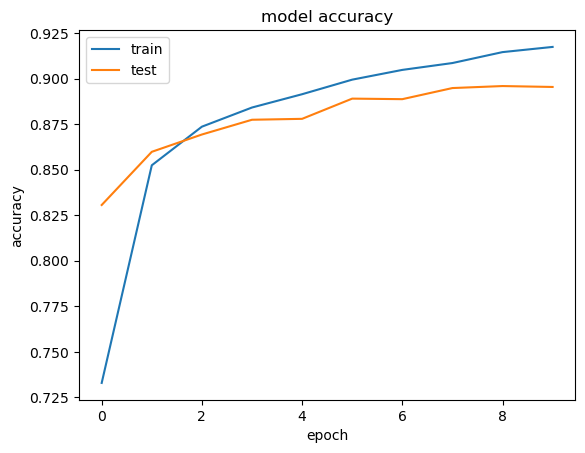

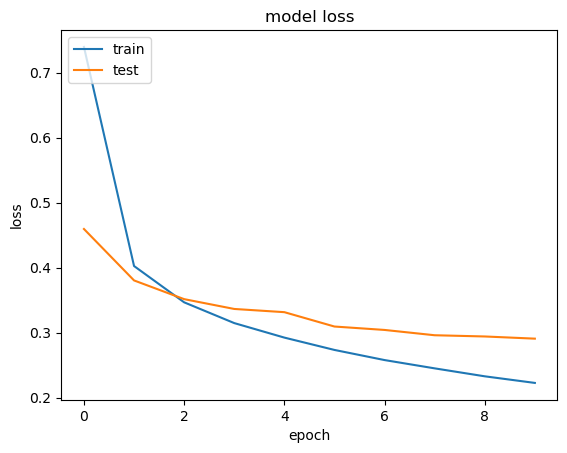

In [ ]:
model = build_cnn_model()

epochs = 10
lrate = 0.005
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=64, verbose=1)
plot_history(history)

In [ ]:
train_acc, test_acc = evaluate_model(model, x_train, y_train, x_test, y_test)

10000/10000 [==============================] - 19s 2ms/step
Training accuracy: 92.71
Testing accuracy: 89.54


✅ Insight: From the previous plots, it is evident that both the accuracy and loss were still improving, indicating that the model had not yet overfitted.

To accelerate convergence and potentially reduce the loss further, the learning rate was slightly increased to 0.005. While a high learning rate can sometimes cause the optimization process to overshoot the loss minimum, this moderate adjustment provided a balanced trade-off between training speed and stability. The results demonstrated an improvement in accuracy without signs of overfitting, confirming the effectiveness of this change.